# 📊 Tutorial de Seaborn: Visualización Estadística de Datos Fotovoltaicos

**Objetivo:** Enseñar los fundamentos de Seaborn, una biblioteca de visualización de datos de alto nivel basada en Matplotlib. Seaborn se integra perfectamente con `pandas` y es excelente para la visualización estadística.

**Contexto:** Usaremos los mismos datos simulados de 3 días de un sistema fotovoltaico (PV) para ver cómo Seaborn puede simplificar la comparación y el análisis estadístico.

## Paso 0: Importar las Bibliotecas

Importamos `pandas` y `numpy` para los datos, `matplotlib.pyplot` (porque Seaborn lo usa por debajo) y, por supuesto, `seaborn` (comúnmente con el alias `sns`).

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Esta "línea mágica" sigue siendo necesaria
%matplotlib inline

# ¡Un truco de Seaborn! Podemos establecer un "tema" (theme) 
# y todos nuestros gráficos (incluidos los de Matplotlib) se verán mejor.
sns.set_theme(style="darkgrid", palette="colorblind")

## Paso 1: Simulación de Datos (Formato Ancho)

Este es el mismo código de simulación del tutorial de Matplotlib. Esto nos da un DataFrame en **formato ancho (Wide-form)**, donde cada día es una columna separada.

In [3]:
# 1. Crear el índice de tiempo (3 días = 72 horas)
timestamps = pd.date_range(start='2025-07-01', periods=72, freq='h')

# 2. Crear el ciclo base de sol (0 en la noche, pico al mediodía)
horas_dia = np.arange(0, 72)
ciclo_solar_base = np.sin(np.pi * (horas_dia % 24) / 24) ** 2
irradiancia_base = np.maximum(0, ciclo_solar_base * 1000 + np.random.normal(0, 5, 72))

# 3. Simular los 3 días
irradiancia_dia1 = irradiancia_base
potencia_dia1 = irradiancia_dia1 * 0.15

irradiancia_dia2 = np.maximum(0, irradiancia_base * 0.4 + np.random.normal(0, 20, 72))
potencia_dia2 = irradiancia_dia2 * 0.15

irradiancia_dia3 = irradiancia_base
potencia_dia3 = irradiancia_dia3 * 0.15
potencia_dia3[24+11] *= 0.3 # Nube densa
potencia_dia3[24+14] *= 0.4 # Nube densa

# 4. Crear el DataFrame de Pandas (Formato Ancho)
df_wide = pd.DataFrame(
    data={
        'Irradiancia_Dia1': irradiancia_dia1,
        'Potencia_Dia1': potencia_dia1,
        'Irradiancia_Dia2': irradiancia_dia2,
        'Potencia_Dia2': potencia_dia2,
        'Irradiancia_Dia3': irradiancia_dia3,
        'Potencia_Dia3': potencia_dia3
    },
    index=timestamps
)

print("Datos en Formato Ancho (Wide-form):")
df_wide.head()

Datos en Formato Ancho (Wide-form):


,Irradiancia_Dia1,Potencia_Dia1,Irradiancia_Dia2,Potencia_Dia2,Irradiancia_Dia3,Potencia_Dia3
2025-07-01 00:00:00,0.000000,0.000000,19.929721,2.989458,0.000000,0.000000
2025-07-01 01:00:00,19.743757,2.961564,0.000000,0.000000,19.743757,2.961564
2025-07-01 02:00:00,69.484432,10.422665,36.592259,5.488839,69.484432,10.422665
2025-07-01 03:00:00,153.417172,23.012576,41.354547,6.203182,153.417172,23.012576
2025-07-01 04:00:00,257.801356,38.670203,69.477923,10.421689,257.801356,38.670203


## Lección 1: ¡La Transformación! (Wide-form vs Long-form)

Este es el paso **MÁS IMPORTANTE** para usar Seaborn.

* **Formato Ancho (Wide):** Cada variable de observación está en su propia columna (ej: `Potencia_Dia1`, `Potencia_Dia2`). Matplotlib funciona bien con esto.
* **Formato Largo (Long):** Hay una columna para la *variable* (ej. `Potencia`) y otra columna para la *categoría* (ej. `Dia`). **Seaborn está diseñado para este formato.**

Usaremos `pandas` para transformar nuestros datos.

In [4]:
# 1. Reseteamos el índice para que 'Timestamp' sea una columna
df_reset = df_wide.reset_index().rename(columns={'index': 'Timestamp'})

# 2. Creamos DataFrames individuales para cada día
df_d1 = df_reset[['Timestamp', 'Irradiancia_Dia1', 'Potencia_Dia1']].rename(
    columns={'Irradiancia_Dia1': 'Irradiancia', 'Potencia_Dia1': 'Potencia'}
)
df_d1['Dia'] = 'Día 1 (Soleado)'

df_d2 = df_reset[['Timestamp', 'Irradiancia_Dia2', 'Potencia_Dia2']].rename(
    columns={'Irradiancia_Dia2': 'Irradiancia', 'Potencia_Dia2': 'Potencia'}
)
df_d2['Dia'] = 'Día 2 (Nublado)'

df_d3 = df_reset[['Timestamp', 'Irradiancia_Dia3', 'Potencia_Dia3']].rename(
    columns={'Irradiancia_Dia3': 'Irradiancia', 'Potencia_Dia3': 'Potencia'}
)
df_d3['Dia'] = 'Día 3 (Parcial)'

# 3. Concatenamos (apilamos) los 3 DFs en uno solo: ¡El Formato Largo!
df_long = pd.concat([df_d1, df_d2, df_d3])

print("Datos en Formato Largo (Long-form):")
# Mostramos el inicio (Día 1)
print(df_long.head())
# Mostramos el final (Día 3)
print("\n...y el final de los datos:")
print(df_long.tail())

Datos en Formato Largo (Long-form):
            Timestamp  Irradiancia   Potencia              Dia
0 2025-07-01 00:00:00     0.000000   0.000000  Día 1 (Soleado)
1 2025-07-01 01:00:00    19.743757   2.961564  Día 1 (Soleado)
2 2025-07-01 02:00:00    69.484432  10.422665  Día 1 (Soleado)
3 2025-07-01 03:00:00   153.417172  23.012576  Día 1 (Soleado)
4 2025-07-01 04:00:00   257.801356  38.670203  Día 1 (Soleado)

...y el final de los datos:
             Timestamp  Irradiancia   Potencia              Dia
67 2025-07-03 19:00:00   368.061465  55.209220  Día 3 (Parcial)
68 2025-07-03 20:00:00   252.830125  37.924519  Día 3 (Parcial)
69 2025-07-03 21:00:00   143.298131  21.494720  Día 3 (Parcial)
70 2025-07-03 22:00:00    59.534372   8.930156  Día 3 (Parcial)
71 2025-07-03 23:00:00    23.550673   3.532601  Día 3 (Parcial)


## Lección 2: Gráfico de Líneas con `sns.lineplot()`

Ahora que tenemos los datos en formato largo, comparar los 3 días es trivial.

Compara esto con la Lección 3 de Matplotlib. Allí, tuvimos que llamar a `plt.plot()` 3 veces, una por cada columna, y añadir `label=` manualmente.

En Seaborn, solo le decimos:
* `data=df_long`: Usa este DataFrame.
* `x='Timestamp'`: El eje X es la columna 'Timestamp'.
* `y='Potencia'`: El eje Y es la columna 'Potencia'.
* `hue='Dia'`: **¡Esta es la magia!** Separa las líneas (dales color) basado en la columna 'Dia' y crea una leyenda automáticamente.

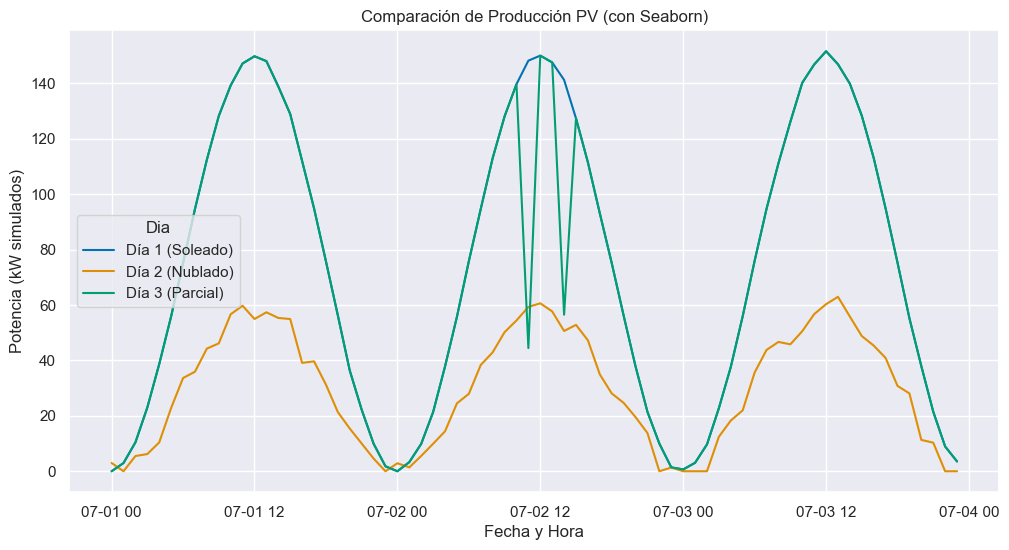

In [5]:
# 1. Definimos el tamaño de la figura (usando plt)
plt.figure(figsize=(12, 6))

# 2. Creamos el gráfico con UNA sola línea de código Seaborn
sns.lineplot(data=df_long, x='Timestamp', y='Potencia', hue='Dia')

# 3. Añadimos títulos (usando plt)
plt.title('Comparación de Producción PV (con Seaborn)')
plt.xlabel('Fecha y Hora')
plt.ylabel('Potencia (kW simulados)')

# 4. Mostrar el gráfico
plt.show()

## Lección 3: Visualizando Relaciones con `sns.scatterplot()` y `sns.lmplot()`

Queremos ver la relación entre Irradiancia y Potencia. Con `hue` podemos ver si esta relación cambia según el día.

`sns.lmplot()` (linear model plot) es aún mejor: es un `scatterplot` que además dibuja una **línea de regresión**.

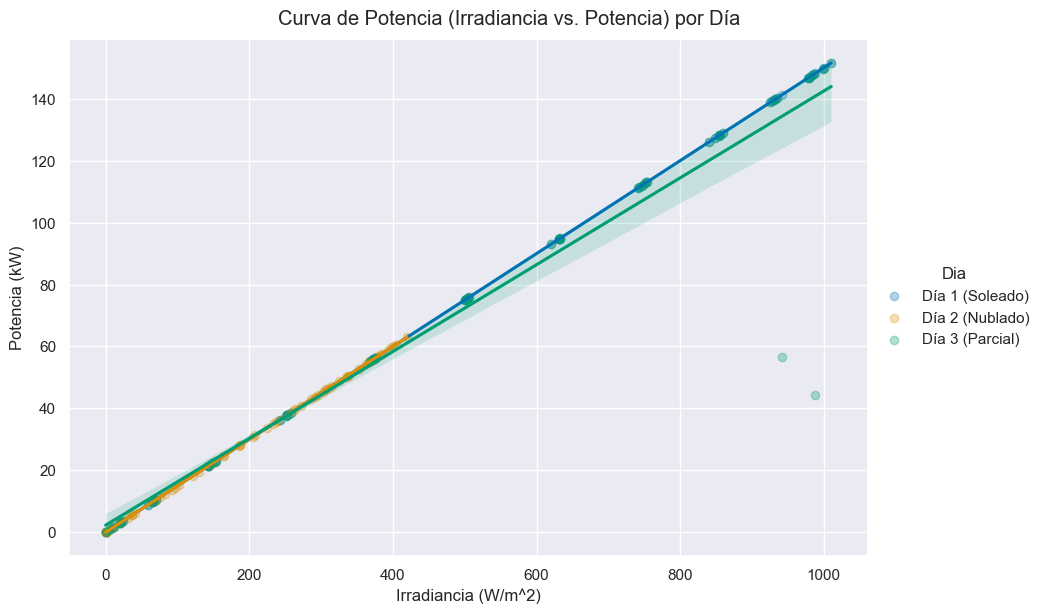

In [6]:
# lmplot es una "función a nivel de figura", por lo que 
# definimos el tamaño con 'height' y 'aspect' (proporción).

g = sns.lmplot(
    data=df_long, 
    x='Irradiancia', 
    y='Potencia', 
    hue='Dia',       # Un color (y una regresión) por día
    height=6,        # Altura de la figura
    aspect=1.5,      # Proporción (ancho = 1.5 * alto)
    scatter_kws={'alpha':0.3} # Hacemos los puntos transparentes
)

# Añadimos títulos
g.set_axis_labels('Irradiancia (W/m^2)', 'Potencia (kW)')
g.fig.suptitle('Curva de Potencia (Irradiancia vs. Potencia) por Día', y=1.02)
plt.show()

# Análisis:
# - Vemos 3 relaciones lineales claras.
# - El Día 1 (azul) y 3 (verde) tienen la misma pendiente (eficiencia).
# - El Día 2 (naranja) tiene una pendiente MENOR. ¡Nuestra simulación 
#   hizo que un día nublado no solo diera menos sol, sino que fuera menos eficiente! 
#   (Esto es un artefacto de la simulación, ¡pero es un hallazgo interesante!)

## Lección 4: Visualizando Distribuciones con `sns.displot()` y `sns.kdeplot()`

¿Cuáles son los valores de potencia más comunes? Un histograma o un KDE (Kernel Density Estimate) nos lo dirá.

`sns.displot()` es la función de Seaborn para esto. Podemos pedirle un histograma (`kind='hist'`) o una curva de densidad (`kind='kde'`).

Vamos a filtrar los valores nocturnos (Potencia = 0) para enfocarnos en la producción diurna.

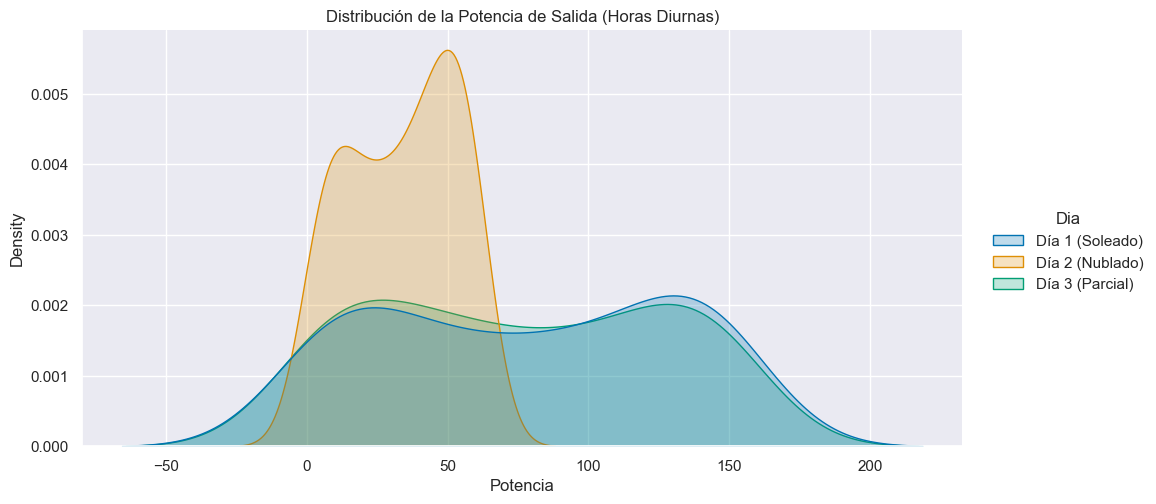

In [7]:
# 1. Filtramos los datos para incluir solo horas con producción
df_dia_solo = df_long[df_long['Potencia'] > 1]

# 2. Usamos displot con kind="kde" (Kernel Density Estimate)
# 'fill=True' rellena el área bajo la curva.
sns.displot(data=df_dia_solo, 
            x='Potencia', 
            hue='Dia', 
            kind='kde', 
            fill=True, 
            height=5, 
            aspect=2)

plt.title('Distribución de la Potencia de Salida (Horas Diurnas)')
plt.show()

# Análisis:
# - Día 1 (Azul): Un pico claro en la potencia máxima. (Día perfecto)
# - Día 2 (Naranja): Una curva larga y plana en potencias bajas. (Día nublado)
# - Día 3 (Verde): Un pico alto como el Día 1, pero con una "cola" 
#   hacia la izquierda, que representa las caídas de potencia por las nubes.

## Lección 5: Comparación Categórica con `sns.boxplot()` y `sns.violinplot()`

Esta es otra gran fortaleza de Seaborn. Si queremos comparar las estadísticas (mediana, cuartiles, atípicos) de una variable numérica (`Potencia`) a través de diferentes categorías (`Dia`), un boxplot es ideal.

Un `violinplot` es aún mejor: combina un `boxplot` con un `kdeplot`.

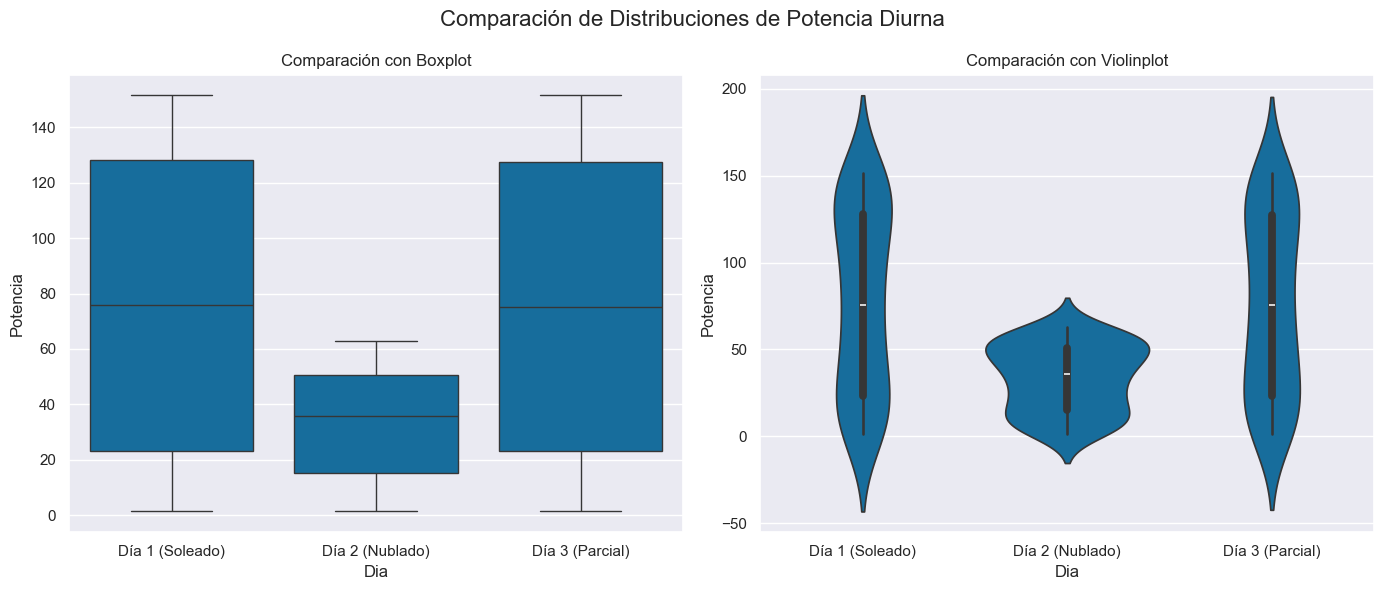

In [8]:
# De nuevo, usamos los datos diurnos (df_dia_solo)

# 1. Creamos una figura con 2 subplots (ejes) para comparar
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Boxplot (Diagrama de Cajas)
sns.boxplot(data=df_dia_solo, x='Dia', y='Potencia', ax=axes[0])
axes[0].set_title('Comparación con Boxplot')

# Gráfico 2: Violinplot (Diagrama de Violín)
sns.violinplot(data=df_dia_solo, x='Dia', y='Potencia', ax=axes[1])
axes[1].set_title('Comparación con Violinplot')

plt.suptitle('Comparación de Distribuciones de Potencia Diurna', fontsize=16)
plt.tight_layout()
plt.show()

# Análisis:
# - Boxplot: Muestra claramente que la mediana (línea central) y el 
#   rango intercuartílico (la caja) del Día 2 es mucho más bajo.
# - Violinplot: Nos da la misma info, pero además muestra la "forma" 
#   de la distribución. Nota cómo el Día 3 (verde) es "gordo" en la parte 
#   superior pero también tiene una panza en la parte inferior (las nubes).

## Lección 6: Facetas (Facets) con `sns.relplot()`

¿Qué pasa si no queremos superponer las líneas (Lección 2), sino ponerlas en gráficos separados, como hicimos con `plt.subplots()` en el tutorial de Matplotlib?

Seaborn lo hace automágicamente usando **facetas**.

`sns.relplot()` (Relational Plot) es una función a nivel de figura (como `lmplot` y `displot`) que puede crear `lineplot` o `scatterplot`.

Le añadiremos el argumento `col='Dia'`, que significa: "Crea un gráfico por cada valor único en la columna 'Dia' y organízalos en columnas".

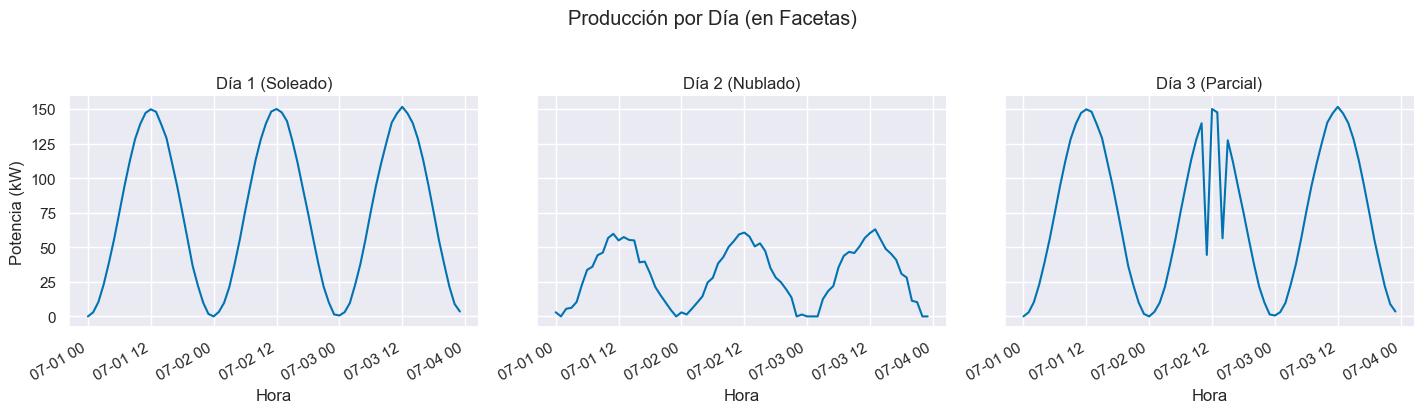

In [9]:
# 1. Usamos relplot (kind='line' es el default si X es temporal)
g = sns.relplot(
    data=df_long,
    x='Timestamp',
    y='Potencia',
    col='Dia',       # ¡La magia de las facetas!
    height=4,
    aspect=1.2,
    kind='line'
)

# 2. Ajustamos títulos (Seaborn ya pone los títulos de columna)
g.fig.suptitle('Producción por Día (en Facetas)', y=1.03)
g.set_axis_labels('Hora', 'Potencia (kW)')
g.set_titles("{col_name}") # Pone el nombre del día como título de cada subplot

# 3. Rotar las etiquetas del eje X para que se lean mejor
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(30)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()

## Conclusión y Próximos Pasos

¡Felicidades! Has aprendido:

1.  La diferencia clave entre **Formato Ancho y Largo** (Tidy Data).
2.  Cómo transformar datos a formato largo con `pandas`.
3.  A usar `sns.lineplot` con el argumento `hue` para crear comparaciones en una línea.
4.  A analizar relaciones y regresiones con `sns.lmplot`.
5.  A visualizar distribuciones con `sns.displot` (usando `kind='kde'`).
6.  A comparar estadísticas de categorías con `sns.boxplot` y `sns.violinplot`.
7.  El poder de las **facetas** (`col=`) con `sns.relplot` para crear subplots automáticamente.

**Desafío:** Intenta usar `sns.jointplot()`. Es una función que combina un `scatterplot` (para ver relaciones) con `histplots` (para ver distribuciones) en un solo gráfico. Úsalo para comparar `Irradiancia` y `Potencia` (usando `df_dia_solo`).